In [1]:
from IPython.core.display import HTML
HTML("<style>.container { width:90% !important; }</style>")

In [2]:
%matplotlib inline

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
from importlib import reload

In [2]:
import lnPi
reload(lnPi)

<module 'lnPi' from '/Users/wpk/Documents/python/lnPi/__init__.py'>

In [3]:
def tag_phases_binary(x):
    return np.argsort(x.argmax[0])
#     if x.base.num_phases_max != 2:
#         raise ValueError('bad tag function')
#     return np.where(x.argmax[0] <= 255/2, 0, 1)
    

#     L = []
        
#     for p in x.phases:
#         if p.molfrac[0] < 0.5:
#             val = 0
#         else:
#             val = 1
#         L.append(val)

#     return np.array(L)



In [144]:
from importlib import reload
import lnPi.core2
import lnPi.segment2
import lnPi.core
reload(lnPi.core)
reload(lnPi.core2)
reload(lnPi.segment2)

<module 'lnPi.segment2' from '/Users/wpk/Documents/python/lnPi/segment2.py'>

In [257]:
base = lnPi.core.lnPi.from_table('./nahs_asym_mix.07_07_07.r1.lnpi_o.dat',mu=[0.5,0.5],fill_value=np.nan, zeromax=True,num_phases_max=5,beta=1.0, volume=1.0, pad=True)


lnpi_ref = lnPi.core.Phases(base=base, build_kwargs=dict(num_phases_max=5, merge=None),ftag_phases=tag_phases_binary, argmax_kwargs=dict(min_distance=[1]))

#lnpi_ref.merge_phases(inplace=True)

In [258]:
lnpi_ref.betaEtransition_matrix()

array([[         inf, 177.36742731,          inf, 207.43072381],
       [177.36742731,          inf, 176.68259496,          inf],
       [         inf, 176.68259496,          inf,          inf],
       [207.43072381,          inf,          inf,          inf]])

In [259]:
lnpi_ref.DeltabetaE_matrix()

array([[           nan, 0.00000000e+00,            inf, 3.00632965e+01],
       [9.62492780e-01,            nan, 2.77660430e-01,            inf],
       [           inf, 1.27818360e-01,            nan,            inf],
       [2.07430724e+02,            inf,            inf,            nan]])

In [260]:
lnpi_ref.merge_phases(inplace=True, efac=1.0, force=False)

In [262]:
lnpi_ref.DeltabetaE_matrix()

array([[         nan,  31.02578928],
       [207.43072381,          nan]])

In [294]:
for x in range(10):
    lnpi_ref = lnPi.core.Phases(base=base, build_kwargs=dict(num_phases_max=5, merge=None),ftag_phases=tag_phases_binary, argmax_kwargs=dict(min_distance=[1]))

    %timeit -n 1 -r 1 lnpi_ref.merge_phases(inplace=True, efac=1.0, force=False)

12.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
13.5 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
12 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
11 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
10.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
10.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
9.14 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
8.49 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
8.74 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
10.5 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [393]:
reload(lnPi.segment2)
reload(lnPi.core2)
base2 = lnPi.core2.MaskedlnPi.from_table('./nahs_asym_mix.07_07_07.r1.lnpi_o.dat',mu=[0.5,0.5], fill_value=np.nan, beta=1.0, volume=1.0).pad(inplace=True).zeromax(inplace=True)


s = lnPi.segment2.Segmenter(min_distance=[1])

labels = s.segment_lnpi(base2)

m = lnPi.segment2.Merger(base2.data, labels)

In [348]:
#%%timeit -n 1 
m = lnPi.segment2.Merger(base2.data, labels)
#m.w_tran

In [349]:
%%timeit -n 1 -r 1
m._cache = {}
new_label, w_tran, w_min = m.merge_labels(efac=1.0)

9.27 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [440]:
b2 = base2.copy()

In [450]:
import skimage

In [447]:
b2.mask[...] |= True

In [449]:
b2

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=nan,
  dtype=float64)

In [335]:
id(b2.data), id(base2.data)

(120821874976, 120821874976)

In [171]:
efac = 0.1
nfeature_max = 4


w_tran = m.w_tran.copy()
w_min  = m.w_min.copy()

force = False

L = [[i] for i in m._index]

mapping = {i : [i] for i in m._index}

for cnt in range(4):
    # number of finite minima
    nfeature = np.isfinite(w_min).sum()

    de = w_tran - w_min
    min_val = np.nanmin(de)
    
    if min_val > efac:
        if not force:
            break
        elif nfeature <= nfeature_max:
            break
            
    idx_keep, idx_kill = [x[0] for x in np.where(de == min_val)]
    
    # keep the one with lower energy
    if w_min[idx_keep] > w_min[idx_kill]:
        idx_keep, idx_kill = idx_kill, idx_keep
    
    
    # idx[0] and idx[1] merge together
    # arbitrarily bick idx[0] to keep and idx[1] to kill
    
    # transition from idx_keep to any other phase equals the minimum transition
    # from either idx_keep or idx_kill to that other phase
    new_tran = w_tran[[idx_keep, idx_kill], :].min(axis=0)
    new_tran[idx_keep] = np.inf
    
    w_tran[idx_keep, :] = w_tran[:, idx_keep] = new_tran
    # get rid of old one
    w_tran[idx_kill, :] = w_tran[:, idx_kill] = np.inf 
    

    # keep track of merging
    L[idx_keep] += L[idx_kill]
    L[idx_kill] = None

    mapping[idx_keep] += mapping[idx_kill]
    del mapping[idx_kill]

#mapping = {i : v for i, v in enumerate(L) if v is not None}

In [177]:
#%%timeit -n 10
new_labels = np.zeros_like(m._labels)
for _feature,(i, _labels) in enumerate(mapping.items()):
    for _label in _labels:
        new_labels[m._labels == _label] = _feature + 1
    

In [173]:
new_labels

array([[3, 3, 3, ..., 2, 2, 2],
       [3, 3, 3, ..., 2, 2, 0],
       [3, 3, 3, ..., 2, 0, 0],
       ...,
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [1503]:
new_labels = np.zeros_like(m._labels)

_feature = 0
for _labels in L:
    if _labels is not None:
        for _label in _labels:
            new_labels[m._labels == _label ] = _feature + 1
        
        _feature += 1
        
    
    
    
    

In [1507]:
np.all(lnpi_ref.labels == new_labels)

True

In [1421]:
m._labels

array([[ 3,  3,  3, ...,  2,  2,  2],
       [ 3,  3,  3, ...,  2,  2, -1],
       [ 3,  3,  3, ...,  2, -1, -1],
       ...,
       [ 3,  3,  3, ..., -1, -1, -1],
       [ 3,  3, -1, ..., -1, -1, -1],
       [ 3, -1, -1, ..., -1, -1, -1]], dtype=int32)

In [1413]:
L

[None, [1, 0, 2], None, [3]]

In [1410]:
de

array([[         inf,          inf,          inf,          inf],
       [         inf,          inf,          inf,  31.02578928],
       [         inf,          inf,          inf,          inf],
       [         inf, 207.43072381,          inf,          inf]])

In [1411]:
w_tran

array([[         inf,          inf,          inf,          inf],
       [         inf,          inf,          inf, 207.43072381],
       [         inf,          inf,          inf,          inf],
       [         inf, 207.43072381,          inf,          inf]])

In [1408]:
w_min

array([[177.36742731],
       [176.40493453],
       [176.5547766 ],
       [ -0.        ]])

In [1506]:
new_labels

array([[2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 0],
       [2, 2, 2, ..., 1, 0, 0],
       ...,
       [2, 2, 2, ..., 0, 0, 0],
       [2, 2, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [1379]:
w_tran

array([[         inf,          inf,          inf, 207.43072381],
       [         inf,          inf,          inf,          inf],
       [         inf,          inf,          inf,          inf],
       [207.43072381,          inf,          inf,          inf]])

In [1363]:
w_tran

array([[177.36742731, 177.36742731, 176.68259496, 207.43072381],
       [177.36742731,          inf, 176.68259496,          inf],
       [176.68259496, 176.68259496,          inf,          inf],
       [207.43072381,          inf,          inf,          inf]])

In [1337]:
w_tran

array([[inf, inf, inf, inf],
       [inf, inf, inf, inf],
       [inf, inf, inf, inf],
       [inf, inf, inf, inf]])

In [1330]:
de

array([[nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [inf, inf, inf, inf]])

In [1314]:
w_tran

array([[1.00000000e+20, 1.00000000e+20, 1.00000000e+20, 1.00000000e+20],
       [1.00000000e+20, 1.77367427e+02, 1.76682595e+02, 2.07430724e+02],
       [1.00000000e+20, 1.76682595e+02,            inf,            inf],
       [1.00000000e+20, 2.07430724e+02,            inf,            inf]])

In [1302]:
w_tran - w_min

/Users/wpk/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in subtract
  """Entry point for launching an IPython kernel.


array([[           nan,            nan,            nan,            nan],
       [           inf, 9.62492780e-01, 2.77660430e-01, 3.10257893e+01],
       [           inf, 1.27818360e-01,            inf,            inf],
       [           inf, 2.07430724e+02,            inf,            inf]])

In [1299]:
de

array([[           nan,            nan,            nan,            nan],
       [           inf, 9.62492780e-01, 2.77660430e-01, 3.10257893e+01],
       [           inf, 1.27818360e-01,            inf,            inf],
       [           inf, 2.07430724e+02,            inf,            inf]])

In [1296]:
w_tran[:, idx_keep] = w_tran[:, [idx_keep, idx_kill]].min(-1)

In [1292]:
w_tran[:, [idx_keep, idx_kill]].min(-1)

array([         inf, 177.36742731, 176.68259496, 207.43072381])

In [1286]:
w_tran

array([[         inf, 177.36742731,          inf, 207.43072381],
       [177.36742731,          inf, 176.68259496,          inf],
       [         inf, 176.68259496,          inf,          inf],
       [207.43072381,          inf,          inf,          inf]])

0.0

In [1231]:
L = [[i] for i in m._index]

In [1232]:
L

[[0], [1], [2], [3]]

In [8]:
def get_spin_bin(ref,mu_in,x,spin_kwargs=None,bin_kwargs=None):
    
    if spin_kwargs is None: spin_kwargs={}
    if bin_kwargs is None: bin_kwargs = {}
    
    #initial estimate
    C = lnPi.core.Collection.from_mu(ref,mu_in,x)
    
    C.get_spinodals(**spin_kwargs)
    C.get_binodals(**bin_kwargs)
    
    return C
            

In [32]:
from tqdm import tqdm_notebook as tqdm

In [33]:
L=[]
for mu2 in tqdm(np.arange(-5,6,0.2),leave=True):
    try:
        C = get_spin_bin(lnpi_ref,[None,mu2],np.linspace(-10,10,2),spin_kwargs=dict(ntry=40,nmax=40))
    except:
        print('error at mu2',mu2)
        break
    L.append(C)

In [50]:
# save labels to file
da_labels = xr.concat([x.to_dataarray() for x in L], dim='rec')
da_labels.to_netcdf('tmp.nc', encoding={'labels': {'zlib': True, 'complevel':5}})

In [51]:
# reload
# da_labels = xr.open_dataset('tmp.nc')

In [ ]:
# We did seperate records for each mu_1,so groupby on mu_1.
# note that if we did different slices, we'd have to change this

lst = []
for i, g in da_labels.groupby(da_labels2.mu_1):
    if g.spinodals.sum() == 0:
        continue
    lst.append(lnPi.core.Collection.from_dataarray(base, g))
    

In [53]:
spin_0 = lnPi.Collection([x.spinodals[0] for x in lst])
spin_1 = lnPi.Collection([x.spinodals[1] for x in lst])
bino   = lnPi.Collection([x.binodals[0] for x in lst])

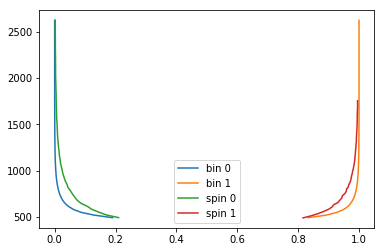

In [55]:
for phase in range(2):
    ds = xr.merge((bino.molfrac_phase, bino.omega_phase())).sel(phase=phase, component=0)
    plt.plot(ds.molfrac, -ds.omega, label='bin {}'.format(phase))
    
for phase, spin in enumerate([spin_0, spin_1]):
    ds = xr.merge((spin.molfrac_phase, spin.omega_phase())).sel(phase=phase, component=0)
    plt.plot(ds.molfrac, -ds.omega, label='spin {}'.format(phase))
    
plt.legend()